In [7]:
from google.colab import files
uploaded = files.upload()

Saving 0.png to 0.png
Saving 1.png to 1.png
Saving 2.png to 2.png
Saving 3.png to 3.png
Saving 4.png to 4.png
Saving 5.png to 5.png
Saving 6.png to 6.png
Saving 7.png to 7.png
Saving 8.png to 8.png
Saving 9.png to 9.png
Saving deeplearning.mplstyle to deeplearning.mplstyle
Saving heart.csv to heart.csv
Saving public_tests.py to public_tests.py
Saving utils.py to utils.py


In [22]:
from google.colab import files
uploaded = files.upload()

Saving deeplearning.mplstyle to deeplearning (2).mplstyle
Saving heart.csv to heart (3).csv
Saving public_tests.py to public_tests (3).py
Saving utils.py to utils (3).py


In [25]:
from google.colab import files
uploaded = files.upload()

Saving 0.png to 0 (2).png
Saving 1.png to 1 (2).png
Saving 2.png to 2 (3).png
Saving 4.png to 4 (2).png
Saving 5.png to 5 (2).png
Saving 6.png to 6 (2).png
Saving 8.png to 8 (2).png
Saving 9.png to 9 (2).png


In [8]:
!pip install ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.0 MB/s eta 0:00:00


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *

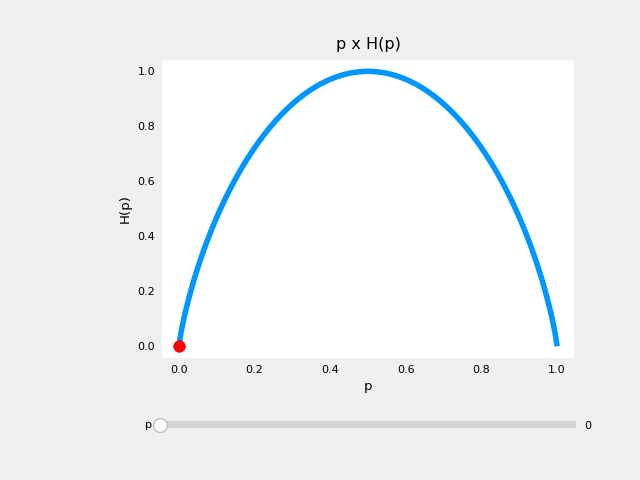

In [10]:
%matplotlib widget
_ = plot_entropy()

In [11]:
X_train = np.array([[1, 1, 1],
[0, 0, 1],
 [0, 1, 0],
 [1, 0, 1],
 [1, 1, 1],
 [1, 1, 0],
 [0, 0, 0],
 [1, 1, 0],
 [0, 1, 0],
 [0, 1, 0]])

y_train = np.array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0])

In [12]:
#For instance, the first example
X_train[0]

array([1, 1, 1])

In [13]:
def entropy(p):
    if p == 0 or p == 1:
        return 0
    else:
        return -p * np.log2(p) - (1- p)*np.log2(1 - p)

print(entropy(0.5))

1.0


In [14]:
def split_indices(X, index_feature):
    """Given a dataset and a index feature, return two lists for the two split nodes, the left node has the animals that have
    that feature = 1 and the right node those that have the feature = 0
    index feature = 0 => ear shape
    index feature = 1 => face shape
    index feature = 2 => whiskers
    """
    left_indices = []
    right_indices = []
    for i,x in enumerate(X):
        if x[index_feature] == 1:
            left_indices.append(i)
        else:
            right_indices.append(i)
    return left_indices, right_indices

In [15]:
split_indices(X_train, 0)

([0, 3, 4, 5, 7], [1, 2, 6, 8, 9])

In [16]:
def weighted_entropy(X,y,left_indices,right_indices):
    """
    This function takes the splitted dataset, the indices we chose to split and returns the weighted entropy.
    """
    w_left = len(left_indices)/len(X)
    w_right = len(right_indices)/len(X)
    p_left = sum(y[left_indices])/len(left_indices)
    p_right = sum(y[right_indices])/len(right_indices)

    weighted_entropy = w_left * entropy(p_left) + w_right * entropy(p_right)
    return weighted_entropy

In [17]:
left_indices, right_indices = split_indices(X_train, 0)
weighted_entropy(X_train, y_train, left_indices, right_indices)

0.7219280948873623

In [18]:
def information_gain(X, y, left_indices, right_indices):
    """
    Here, X has the elements in the node and y is theirs respectives classes
    """
    p_node = sum(y)/len(y)
    h_node = entropy(p_node)
    w_entropy = weighted_entropy(X,y,left_indices,right_indices)
    return h_node - w_entropy

In [19]:
information_gain(X_train, y_train, left_indices, right_indices)

0.2780719051126377

In [20]:
for i, feature_name in enumerate(['Ear Shape', 'Face Shape', 'Whiskers']):
    left_indices, right_indices = split_indices(X_train, i)
    i_gain = information_gain(X_train, y_train, left_indices, right_indices)
    print(f"Feature: {feature_name}, information gain if we split the root node using this feature: {i_gain:.2f}")


Feature: Ear Shape, information gain if we split the root node using this feature: 0.28
Feature: Face Shape, information gain if we split the root node using this feature: 0.03
Feature: Whiskers, information gain if we split the root node using this feature: 0.12


In [21]:
def build_tree_recursive(X, y, indices, node_name, max_depth, current_depth, tree):
    """
    A simple recursive function to build a decision tree.
    This is a placeholder and needs to be fleshed out based on your specific requirements.
    """
    # Base case: Stop if we reach the maximum depth or have no data
    if current_depth >= max_depth or len(indices) == 0:
        return

    # Placeholder logic for splitting and creating child nodes
    # ... (You'll need to implement the actual decision tree logic here)

    # Recursively build the left and right subtrees
    left_indices, right_indices = split_indices(X, 0) # Replace with your splitting logic
    build_tree_recursive(X, y, left_indices, "Left Child", max_depth, current_depth + 1, tree)
    build_tree_recursive(X, y, right_indices, "Right Child", max_depth, current_depth + 1, tree)

    # Append node information to the tree
    tree.append({'name': node_name, 'depth': current_depth})

In [28]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [31]:
import os
from PIL import Image

# Lista de índices de nodos
node_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Ruta del directorio de imágenes
image_directory = 'images'

# Crear el directorio si no existe
if not os.path.exists(image_directory):
    os.makedirs(image_directory)

# Crear imágenes vacías para los índices de nodos
for idx in node_indices:
    image_path = os.path.join(image_directory, f"{idx}.png")
    # Crear una imagen vacía (por ejemplo, 100x100 píxeles, color blanco)
    if not os.path.exists(image_path):
        image = Image.new('RGB', (100, 100), color='white')
        image.save(image_path)

print("Imágenes de prueba creadas.")

Imágenes de prueba creadas.


In [32]:
def generate_node_image(node_indices):
    image_paths = ["images/%d.png" % idx for idx in node_indices]
    images = []
    for path in image_paths:
        if os.path.exists(path):
            images.append(Image.open(path))
        else:
            # Crear una imagen vacía si no existe el archivo
            image = Image.new('RGB', (100, 100), color='white')
            images.append(image)
    widths, heights = zip(*(i.size for i in images))

In [35]:
import networkx as nx
import matplotlib.pyplot as plt
from PIL import Image
import os

def generate_node_image(node_indices):
    image_paths = ["images/%d.png" % idx for idx in node_indices]
    images = []
    for path in image_paths:
        if os.path.exists(path):
            images.append(Image.open(path))
        else:
            # Crear una imagen vacía si no existe el archivo
            image = Image.new('RGB', (100, 100), color='white')
            images.append(image)
    widths, heights = zip(*(i.size for i in images))
    total_width = sum(widths)
    max_height = max(heights)

    new_image = Image.new('RGB', (total_width, max_height))

    x_offset = 0
    for img in images:
        new_image.paste(img, (x_offset, 0))
        x_offset += img.width

    return new_image

def generate_tree_viz(root_indices, y, tree):
    G = nx.DiGraph()

    # Crear el nodo raíz
    G.add_node(0, image=generate_node_image(root_indices))
    idx = 1

    # Iterar sobre los niveles del árbol
    for i, level in enumerate(tree):
        # Asegurarse de que level es una lista de listas
        if isinstance(level, list):
            indices_list = level[:2]
            for indices in indices_list:
                # Crear un nodo para cada conjunto de índices
                G.add_node(idx, image=generate_node_image(indices))
                idx += 1
        else:
            raise ValueError("Cada nivel del árbol debe ser una lista de listas de índices")

    # Dibujo del árbol
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))

    for n in G.nodes:
        nx.draw_networkx_nodes(G, pos, nodelist=[n], node_size=500)
        image = G.nodes[n]['image']
        imagebox = OffsetImage(image, zoom=0.1)
        ab = AnnotationBbox(imagebox, pos[n], frameon=False)
        plt.gca().add_artist(ab)

    nx.draw_networkx_edges(G, pos)
    plt.show()

In [37]:
def build_tree_recursive(X, y, indices, node_name, max_depth, current_depth, tree):
    if current_depth == max_depth:
        tree.append([indices])
        return

    # Dividir los datos en dos grupos como ejemplo (esto es solo un pseudocódigo)
    mid_point = len(indices) // 2
    left_indices = indices[:mid_point]
    right_indices = indices[mid_point:]

    if current_depth == 0:
        tree.append([])  # Inicializar la lista para el primer nivel

    tree[current_depth].append(left_indices)
    tree[current_depth].append(right_indices)

    # Recursión para los nodos hijos
    build_tree_recursive(X, y, left_indices, "Left", max_depth, current_depth + 1, tree)
    build_tree_recursive(X, y, right_indices, "Right", max_depth, current_depth + 1, tree)

In [38]:
import networkx as nx
import matplotlib.pyplot as plt
from PIL import Image
import os
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def generate_node_image(node_indices):
    image_paths = ["images/%d.png" % idx for idx in node_indices]
    images = []
    for path in image_paths:
        if os.path.exists(path):
            images.append(Image.open(path))
        else:
            image = Image.new('RGB', (100, 100), color='white')
            images.append(image)
    widths, heights = zip(*(i.size for i in images))
    total_width = sum(widths)
    max_height = max(heights)

    new_image = Image.new('RGB', (total_width, max_height))

    x_offset = 0
    for img in images:
        new_image.paste(img, (x_offset, 0))
        x_offset += img.width

    return new_image

def generate_tree_viz(root_indices, y, tree):
    G = nx.DiGraph()

    G.add_node(0, image=generate_node_image(root_indices))
    idx = 1

    for i, level in enumerate(tree):
        if isinstance(level, list) and all(isinstance(sublist, list) for sublist in level):
            for indices in level:
                G.add_node(idx, image=generate_node_image(indices))
                idx += 1
        else:
            raise ValueError("Cada nivel del árbol debe ser una lista de listas de índices")

    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))

    for n in G.nodes:
        nx.draw_networkx_nodes(G, pos, nodelist=[n], node_size=500)
        image = G.nodes[n]['image']
        imagebox = OffsetImage(image, zoom=0.1)
        ab = AnnotationBbox(imagebox, pos[n], frameon=False)
        plt.gca().add_artist(ab)

    nx.draw_networkx_edges(G, pos)
    plt.show()

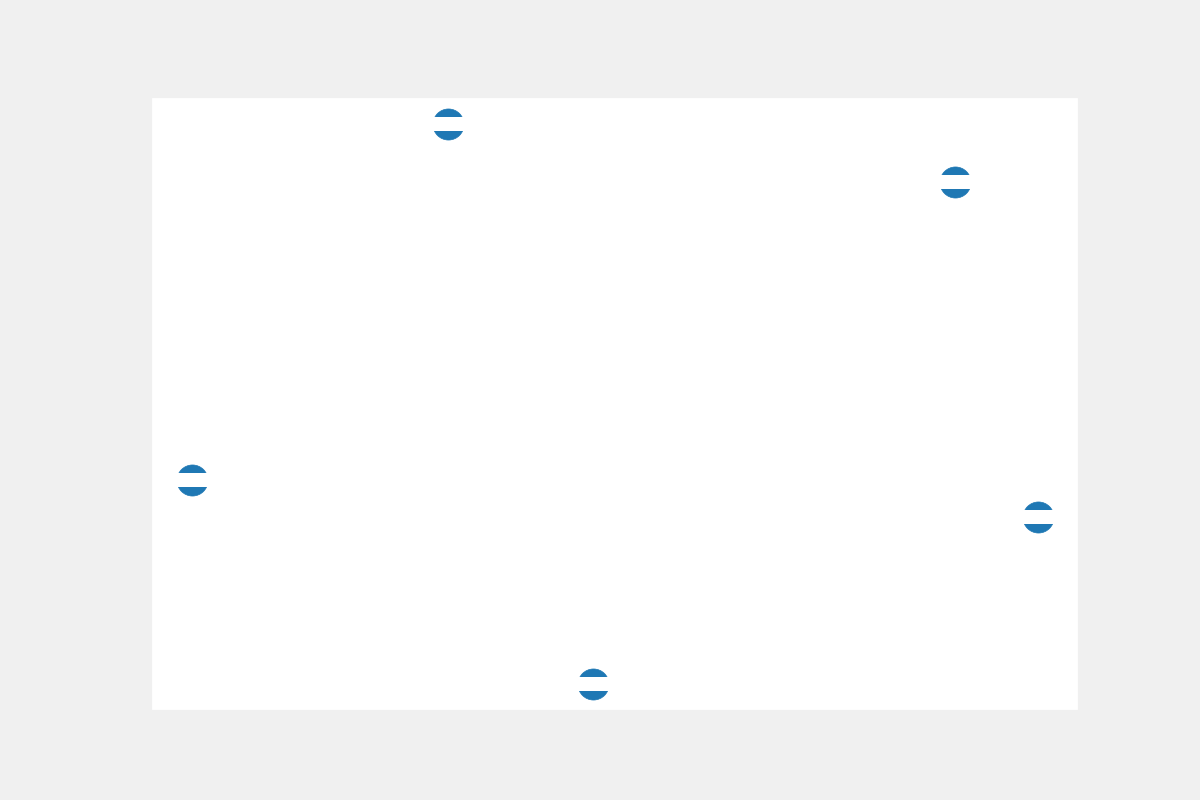

In [39]:
tree = []
build_tree_recursive(X_train, y_train, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], "Root", max_depth=1, current_depth=0, tree=tree)
generate_tree_viz([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], y_train, tree)

In [41]:
def build_tree_recursive(X, y, indices, node_name, max_depth, current_depth, tree):
    if current_depth == max_depth:
        if len(tree) <= current_depth:
            tree.append([])
        tree[current_depth].append(indices)
        return

    # Dividir los datos en dos grupos como ejemplo (esto es solo un pseudocódigo)
    mid_point = len(indices) // 2
    left_indices = indices[:mid_point]
    right_indices = indices[mid_point:]

    if len(tree) <= current_depth:
        tree.append([])  # Inicializar la lista para el nivel actual si no existe

    tree[current_depth].append(left_indices)
    tree[current_depth].append(right_indices)

    # Recursión para los nodos hijos
    build_tree_recursive(X, y, left_indices, "Left", max_depth, current_depth + 1, tree)
    build_tree_recursive(X, y, right_indices, "Right", max_depth, current_depth + 1, tree)

In [42]:
import networkx as nx
import matplotlib.pyplot as plt
from PIL import Image
import os
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def generate_node_image(node_indices):
    image_paths = ["images/%d.png" % idx for idx in node_indices]
    images = []
    for path in image_paths:
        if os.path.exists(path):
            images.append(Image.open(path))
        else:
            image = Image.new('RGB', (100, 100), color='white')
            images.append(image)
    widths, heights = zip(*(i.size for i in images))
    total_width = sum(widths)
    max_height = max(heights)

    new_image = Image.new('RGB', (total_width, max_height))

    x_offset = 0
    for img in images:
        new_image.paste(img, (x_offset, 0))
        x_offset += img.width

    return new_image

def generate_tree_viz(root_indices, y, tree):
    G = nx.DiGraph()

    G.add_node(0, image=generate_node_image(root_indices))
    idx = 1
    parent_indices = [0]  # Lista de índices de nodos padres para cada nivel

    for level in tree:
        new_parent_indices = []
        for parent_index in parent_indices:
            for indices in level:
                G.add_node(idx, image=generate_node_image(indices))
                G.add_edge(parent_index, idx)
                new_parent_indices.append(idx)
                idx += 1
        parent_indices = new_parent_indices

    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))

    for n in G.nodes:
        nx.draw_networkx_nodes(G, pos, nodelist=[n], node_size=500)
        image = G.nodes[n]['image']
        imagebox = OffsetImage(image, zoom=0.1)
        ab = AnnotationBbox(imagebox, pos[n], frameon=False)
        plt.gca().add_artist(ab)

    nx.draw_networkx_edges(G, pos)
    plt.show()

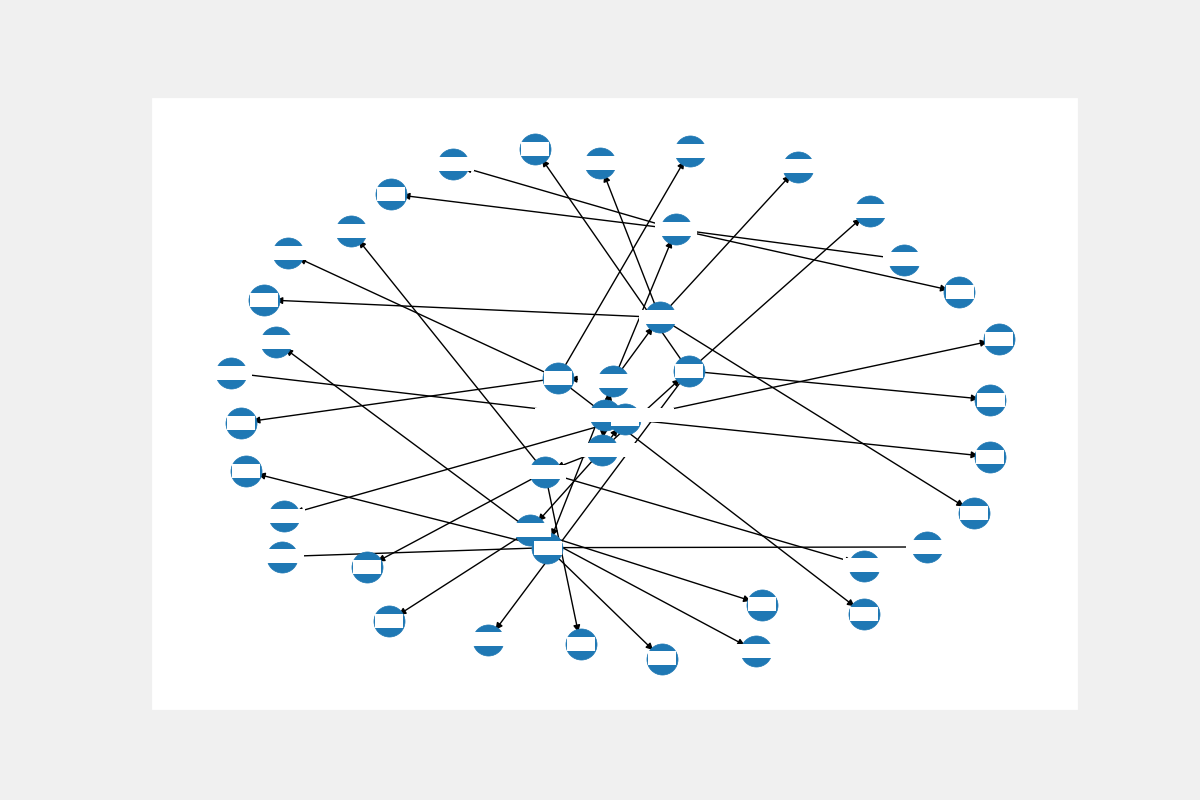

In [43]:
tree = []
build_tree_recursive(X_train, y_train, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], "Root", max_depth=2, current_depth=0, tree=tree)
generate_tree_viz([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], y_train, tree)